<h1>PDIoT Data Analysis</h1>
<p>Hopefully by now you have collected some HAR data. We are asking you to collect data from two sensors - the Respeck (25Hz, accel and gyro) and the Thingy (25Hz, accel, gyro and magnetometer).</p>

<p> The Respeck is worn on the lower left ribcage, and the Thingy is worn in the front right pocket of the trousers. </p>

<p> We will explore some example data in this notebook. </p>

<h3>Accelerometer</h3>
<ul>
    <li>Measures acceleration (including gravity)</li>
    <li>Observing the change in direction of gravity often more useful than linear acceleration due to movement</li>
    <li>Sensor values given in g along the axis of interest</li>
    <li>Placing our sensor flat on the table should give -1g on the Z axis and 0g on the other axes</li>
    <li>Cheap to buy and low power consumption</li>
</ul>

<h3>Gyroscope</h3>
<ul>
    <li>Measures angular velocity</li>
    <li>Sensor values given in radians per second (deg/sec) along the axis of interest</li>
    <li>Placing our sensor flat on the table should give 0 values along all axes</li>
    <li>Higher power consumption</li>
</ul>

<h2>Human Activity Recognition</h2>

<p>Your are expected to research and develop the HAR algorithm yourselves during the course. A useful first stage  will be to look at some activity data visually to understand how the sensors react to different types of movement.</p>

<p>You are free to use any programming language for the data analysis part of the project, but we recommend using Python and Jupyter Notebook to quickly explore ideas. Below is a simple example using Python/Pandas to graph acceleration data from a sample of walking data.</p>

#### Basic imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
# %matplotlib notebook

### Reading the header

The files contain a header of size 5. This is where we specify the recording values:
- sensor type (Respeck or Thingy)
- activity type
- activity code (you can find the mapping between activities and their codes in the Constants file on the app)
- subject ID (always a student number)
- notes (can be empty)

In [282]:
filename_respeck = "./Data/Dirty/Respeck_s1817967_Walking at normal speed_30-09-2022_16-29-44.csv"
header_size = 5

with open(filename_respeck) as f:
    head = [next(f).rstrip().split('# ')[1] for x in range(header_size)]
    for l in head:
        print(l)
        

Sensor type: Respeck
Activity type: Walking at normal speed
Activity code: 1
Subject id: s1817967
Notes: test1


### Getting the recording metadata

It's useful to store the metadata about each recording, as you will need it for later.

In [283]:
sensor_type = ""
activity_type = ""
activity_code = -1
subject_id = ""
notes = ""

with open(filename_respeck) as f:
    head = [next(f).rstrip().split('# ')[1] for x in range(header_size)]
    for l in head:
        print(l)
        
        title, value = l.split(":")
        
        if title == "Sensor type":
            sensor_type = value.strip()
        elif title == "Activity type":
            activity_type = value.strip()
        elif title == "Activity code":
            activity_code = int(value.strip())
        elif title == "Subject id":
            subject_id = value.strip()
        elif title == "Notes":
            notes = value.strip()

Sensor type: Respeck
Activity type: Walking at normal speed
Activity code: 1
Subject id: s1817967
Notes: test1


You might use this later so you can pack it up into a function

In [201]:
def extract_header_info(filename: str, header_size: int = 5) -> Tuple[str, str, int, str, str]:
    """
    :param filename: Path to recording file.
    :param header_size: The size of the header, defaults to 5.
    :returns: A 5-tuple containing the sensor type, activity type, activity code, subject id and any notes.
    """
    sensor_type = ""
    activity_type = ""
    activity_code = -1
    subject_id = ""
    notes = ""

    with open(filename) as f:
        head = [next(f).rstrip().split('# ')[1] for x in range(header_size)]
        for l in head:
            print(l)

            title, value = l.split(":")

            if title == "Sensor type":
                sensor_type = value.strip()
            elif title == "Activity type":
                activity_type = value.strip()
            elif title == "Activity code":
                activity_code = int(value.strip())
            elif title == "Subject id":
                subject_id = value.strip()
            elif title == "Notes":
                notes = value.strip()
    
    return sensor_type, activity_type, activity_code, subject_id, notes

And now we can get the variables by applying the function

In [284]:
sensor_type, activity_type, activity_code, subject_id, notes = extract_header_info(filename=filename_respeck)

Sensor type: Respeck
Activity type: Walking at normal speed
Activity code: 1
Subject id: s1817967
Notes: test1


### Reading the file

You can load the file itself using Pandas. You need to specify the amount of rows to be skipped in the beginning (the header size).

In [79]:
df_respeck = pd.read_csv(filename_respeck, header=header_size)
print(df_respeck)

         timestamp   accel_x   accel_y   accel_z    gyro_x     gyro_y  \
0    1664551946286 -0.279541 -0.943420  0.182800 -3.203125  -8.515625   
1    1664551946294 -0.289062 -0.925110  0.164246 -2.687500  -5.109375   
2    1664551946328 -0.228271 -0.805481  0.131531 -0.843750  -0.187500   
3    1664551946357 -0.276855 -0.815735  0.228455 -2.875000  -8.718750   
4    1664551946410 -0.259277 -0.691956  0.108582 -4.843750  -0.312500   
..             ...       ...       ...       ...       ...        ...   
843  1664551979507 -0.314209 -0.894836  0.297302 -1.078125  -4.484375   
844  1664551979552 -0.381592 -0.837952  0.267029  2.890625 -13.734375   
845  1664551979597 -0.480713 -1.166321  0.338562 -8.843750  -0.796875   
846  1664551979627 -0.392090 -1.466858  0.140808  4.031250  17.843750   
847  1664551979673 -0.186523 -1.199280  0.234314  5.359375  16.062500   

       gyro_z  
0    0.500000  
1    0.656250  
2    1.593750  
3    1.640625  
4    2.906250  
..        ...  
843  3.5156

To save the recording metadata for later we can append them as values in new columns

In [80]:
df_respeck['sensor_type'] = sensor_type
df_respeck['activity_type'] = activity_type
df_respeck['activity_code'] = activity_code
df_respeck['subject_id'] = subject_id
df_respeck['notes'] = notes

In [81]:
df_respeck

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes
0,1664551946286,-0.279541,-0.943420,0.182800,-3.203125,-8.515625,0.500000,Respeck,Descending stairs,13,s1817967,test1
1,1664551946294,-0.289062,-0.925110,0.164246,-2.687500,-5.109375,0.656250,Respeck,Descending stairs,13,s1817967,test1
2,1664551946328,-0.228271,-0.805481,0.131531,-0.843750,-0.187500,1.593750,Respeck,Descending stairs,13,s1817967,test1
3,1664551946357,-0.276855,-0.815735,0.228455,-2.875000,-8.718750,1.640625,Respeck,Descending stairs,13,s1817967,test1
4,1664551946410,-0.259277,-0.691956,0.108582,-4.843750,-0.312500,2.906250,Respeck,Descending stairs,13,s1817967,test1
...,...,...,...,...,...,...,...,...,...,...,...,...
843,1664551979507,-0.314209,-0.894836,0.297302,-1.078125,-4.484375,3.515625,Respeck,Descending stairs,13,s1817967,test1
844,1664551979552,-0.381592,-0.837952,0.267029,2.890625,-13.734375,3.593750,Respeck,Descending stairs,13,s1817967,test1
845,1664551979597,-0.480713,-1.166321,0.338562,-8.843750,-0.796875,0.796875,Respeck,Descending stairs,13,s1817967,test1
846,1664551979627,-0.392090,-1.466858,0.140808,4.031250,17.843750,-1.625000,Respeck,Descending stairs,13,s1817967,test1


One more important value to save for later is a recording ID. This will be used to split the entire dataset into separate recordings before you start doing any further splitting into windows. The name of the file can act as the unique recording ID for each recording. 

In [82]:
filename_respeck.split("/")[-1].split(".")[0]

'Respeck_s1817967_Descending stairs_30-09-2022_16-32-59'

In [83]:
df_respeck['recording_id'] = filename_respeck.split("/")[-1].split(".")[0]

In [84]:
df_respeck

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,1664551946286,-0.279541,-0.943420,0.182800,-3.203125,-8.515625,0.500000,Respeck,Descending stairs,13,s1817967,test1,Respeck_s1817967_Descending stairs_30-09-2022_...
1,1664551946294,-0.289062,-0.925110,0.164246,-2.687500,-5.109375,0.656250,Respeck,Descending stairs,13,s1817967,test1,Respeck_s1817967_Descending stairs_30-09-2022_...
2,1664551946328,-0.228271,-0.805481,0.131531,-0.843750,-0.187500,1.593750,Respeck,Descending stairs,13,s1817967,test1,Respeck_s1817967_Descending stairs_30-09-2022_...
3,1664551946357,-0.276855,-0.815735,0.228455,-2.875000,-8.718750,1.640625,Respeck,Descending stairs,13,s1817967,test1,Respeck_s1817967_Descending stairs_30-09-2022_...
4,1664551946410,-0.259277,-0.691956,0.108582,-4.843750,-0.312500,2.906250,Respeck,Descending stairs,13,s1817967,test1,Respeck_s1817967_Descending stairs_30-09-2022_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,1664551979507,-0.314209,-0.894836,0.297302,-1.078125,-4.484375,3.515625,Respeck,Descending stairs,13,s1817967,test1,Respeck_s1817967_Descending stairs_30-09-2022_...
844,1664551979552,-0.381592,-0.837952,0.267029,2.890625,-13.734375,3.593750,Respeck,Descending stairs,13,s1817967,test1,Respeck_s1817967_Descending stairs_30-09-2022_...
845,1664551979597,-0.480713,-1.166321,0.338562,-8.843750,-0.796875,0.796875,Respeck,Descending stairs,13,s1817967,test1,Respeck_s1817967_Descending stairs_30-09-2022_...
846,1664551979627,-0.392090,-1.466858,0.140808,4.031250,17.843750,-1.625000,Respeck,Descending stairs,13,s1817967,test1,Respeck_s1817967_Descending stairs_30-09-2022_...


One useful function is checking the frequency of your recordings. The sensors are both running at 25Hz but it is possible that some packets are dropped along the way. You can use the below function to quickly check the frequency of any of your recordings.

In [86]:
def get_frequency(dataframe: pd.DataFrame, ts_column: str = 'timestamp') -> float:
    """
    :param dataframe: Dataframe containing sensor data. It needs to have a 'timestamp' column.
    :param ts_column: The name of the column containing the timestamps. Default is 'timestamp'.
    :returns: Frequency in Hz (samples per second)
    """

    return len(dataframe) / ((dataframe[ts_column].iloc[-1] - dataframe[ts_column].iloc[0]) / 1000)

In [85]:
get_frequency(df_respeck)

25.399107437026387

Here we can see that the frequency of this recording is a bit over 25Hz, which is considered normal. You should be worried if your recordings deviate with more than 2Hz from the 25Hz threshold. 

You can load the thingy data in a similar way

In [63]:
filename_thingy = "./Data/Dirty/Thingy_s1817967_Climbing stairs_30-09-2022_17-09-17.csv"

# extract header information
sensor_type, activity_type, activity_code, subject_id, notes = extract_header_info(filename=filename_thingy)

# load data
df_thingy = pd.read_csv(filename_thingy, header=header_size)

# append recording metadata
df_thingy['sensor_type'] = sensor_type
df_thingy['activity_type'] = activity_type
df_thingy['activity_code'] = activity_code
df_thingy['subject_id'] = subject_id
df_thingy['notes'] = notes

# get the recording ID
df_thingy['recording_id'] = filename_thingy.split("/")[-1].split(".")[0]

Sensor type: Thingy
Activity type: Climbing stairs
Activity code: 12
Subject id: s1817967
Notes: test1


In [65]:
df_thingy

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,1664554124240,-0.986328,-0.220703,0.088867,-66.25000,58.81250,109.68750,0.0000,0.0000,0.000,Thingy,Climbing stairs,12,s1817967,test1,Thingy_s1817967_Climbing stairs_30-09-2022_17-...
1,1664554124271,-0.958984,-0.210938,0.037109,51.71875,11.65625,106.65625,0.0000,0.0000,0.000,Thingy,Climbing stairs,12,s1817967,test1,Thingy_s1817967_Climbing stairs_30-09-2022_17-...
2,1664554124300,-0.746094,-0.214844,0.046875,120.68750,9.37500,100.96875,0.0000,0.0000,0.000,Thingy,Climbing stairs,12,s1817967,test1,Thingy_s1817967_Climbing stairs_30-09-2022_17-...
3,1664554124363,-0.756836,-0.286133,0.009766,155.12500,27.68750,78.62500,0.0000,0.0000,0.000,Thingy,Climbing stairs,12,s1817967,test1,Thingy_s1817967_Climbing stairs_30-09-2022_17-...
4,1664554124389,-0.782227,-0.384766,-0.104492,60.03125,60.78125,40.06250,0.0000,0.0000,0.000,Thingy,Climbing stairs,12,s1817967,test1,Thingy_s1817967_Climbing stairs_30-09-2022_17-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,1664554157148,-1.427734,-0.120117,-0.138672,20.65625,4.31250,7.65625,-61.1875,13.8125,-154.875,Thingy,Climbing stairs,12,s1817967,test1,Thingy_s1817967_Climbing stairs_30-09-2022_17-...
824,1664554157178,-1.549805,0.267578,0.016602,-28.12500,-6.84375,-10.59375,0.0000,0.0000,0.000,Thingy,Climbing stairs,12,s1817967,test1,Thingy_s1817967_Climbing stairs_30-09-2022_17-...
825,1664554157208,-1.208984,0.125000,0.001953,-43.90625,-23.81250,-12.31250,0.0000,0.0000,0.000,Thingy,Climbing stairs,12,s1817967,test1,Thingy_s1817967_Climbing stairs_30-09-2022_17-...
826,1664554157269,-1.138672,-0.018555,0.058594,-19.31250,-46.28125,-33.43750,0.0000,0.0000,0.000,Thingy,Climbing stairs,12,s1817967,test1,Thingy_s1817967_Climbing stairs_30-09-2022_17-...


### Visualising data

Next we will learn how to visualise the data from both sensors.

Be careful when plotting sensor data, if you are trying to compare activities you need to make sure that the axes match. Accelerometer and Gyroscope data are measured on very different scales - accelerometer data is usually in the range [-4, 4], while gyroscope data can get to the 10s and 100s. You should not plot them on the same plot.

In [66]:
df_respeck

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z
0,1664551906550,-0.215820,-1.460754,0.041931,-2.640625,23.453125,-9.828125
1,1664551906578,-0.247559,-1.222961,-0.188538,-12.000000,19.453125,-8.906250
2,1664551906624,-0.343018,-0.984680,-0.045715,-21.750000,25.375000,-6.859375
3,1664551906668,-0.207031,-0.988586,-0.079651,-9.953125,33.328125,-5.812500
4,1664551906701,-0.206787,-1.004211,-0.052551,-1.828125,16.953125,0.343750
...,...,...,...,...,...,...,...
758,1664551936457,-0.677246,-1.188293,0.474060,12.687500,22.015625,1.375000
759,1664551936502,-0.507568,-1.258850,0.090027,0.062500,20.875000,-0.593750
760,1664551936532,-0.202881,-1.252991,-0.157776,8.671875,45.828125,-0.578125
761,1664551936579,0.131104,-1.172424,-0.154602,22.687500,2.890625,1.406250


Text(0.5, 1.0, 'Thingy - Climbing stairs \n Gyroscope data')

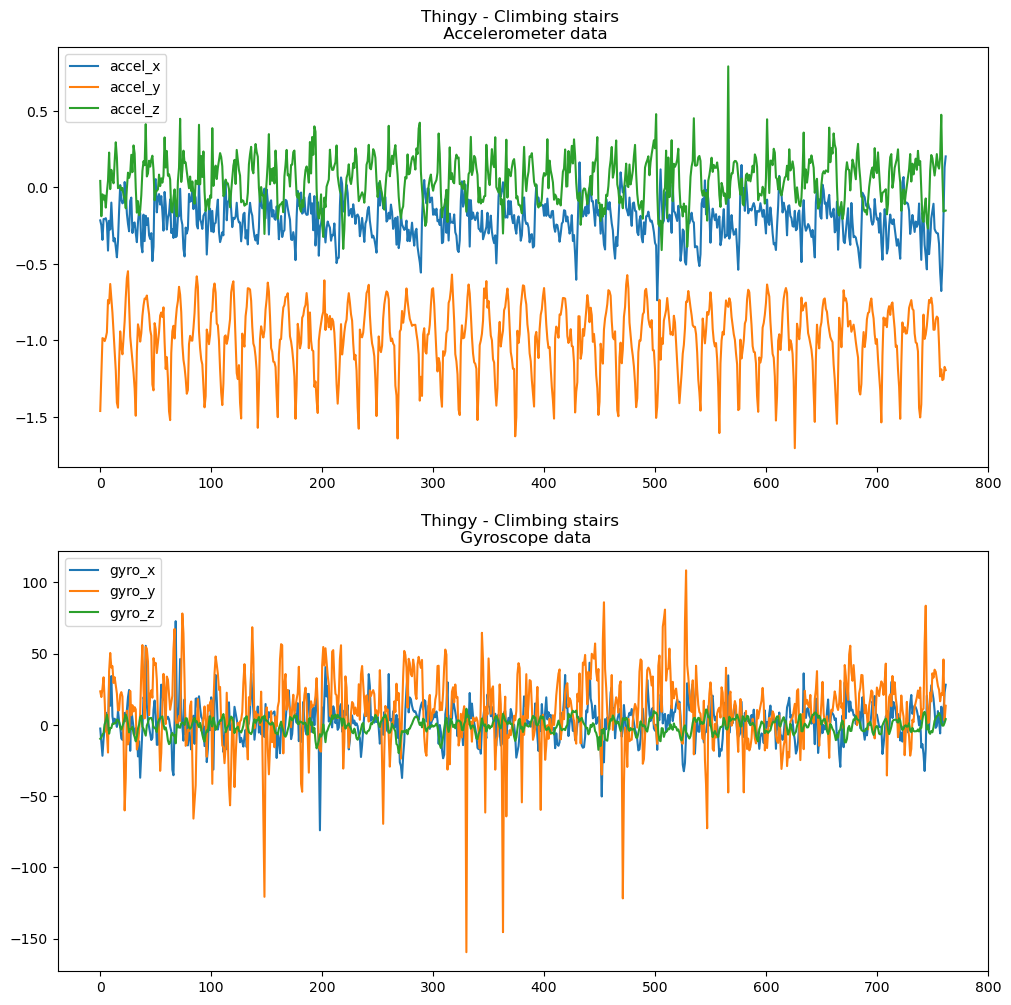

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# plot respeck
ax[0].plot(df_respeck['accel_x'], label="accel_x")
ax[0].plot(df_respeck['accel_y'], label="accel_y")
ax[0].plot(df_respeck['accel_z'], label="accel_z")
ax[0].legend()

ax[0].set_title(f"{df_respeck['sensor_type'].values[0]} - {df_respeck['activity_type'].values[0]} \n Accelerometer data")

ax[1].plot(df_respeck['gyro_x'], label="gyro_x")
ax[1].plot(df_respeck['gyro_y'], label="gyro_y")
ax[1].plot(df_respeck['gyro_z'], label="gyro_z")
ax[1].legend()

ax[1].set_title(f"{df_respeck['sensor_type'].values[0]} - {df_respeck['activity_type'].values[0]} \n Gyroscope data")

Text(0.5, 1.0, 'Thingy - Climbing stairs \n Magnetometer data')

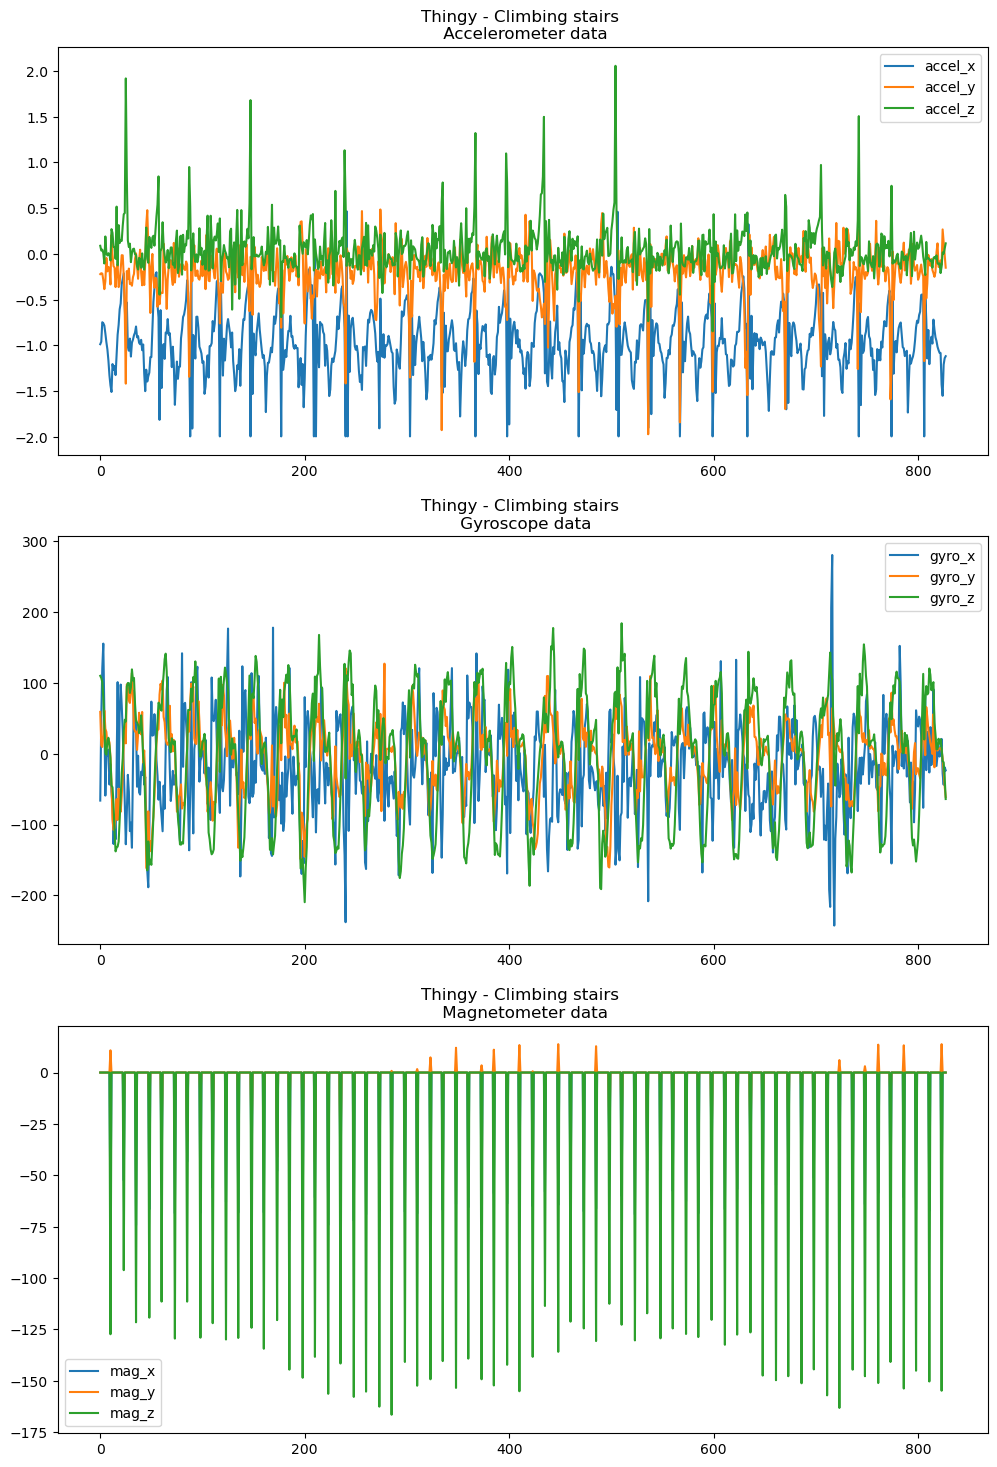

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# plot thingy
ax[0].plot(df_thingy['accel_x'], label="accel_x")
ax[0].plot(df_thingy['accel_y'], label="accel_y")
ax[0].plot(df_thingy['accel_z'], label="accel_z")
ax[0].legend()

ax[0].set_title(f"{df_thingy['sensor_type'].values[0]} - {df_thingy['activity_type'].values[0]} \n Accelerometer data")

ax[1].plot(df_thingy['gyro_x'], label="gyro_x")
ax[1].plot(df_thingy['gyro_y'], label="gyro_y")
ax[1].plot(df_thingy['gyro_z'], label="gyro_z")
ax[1].legend()

ax[1].set_title(f"{df_thingy['sensor_type'].values[0]} - {df_thingy['activity_type'].values[0]} \n Gyroscope data")

ax[2].plot(df_thingy['mag_x'], label="mag_x")
ax[2].plot(df_thingy['mag_y'], label="mag_y")
ax[2].plot(df_thingy['mag_z'], label="mag_z")
ax[2].legend()

ax[2].set_title(f"{df_thingy['sensor_type'].values[0]} - {df_thingy['activity_type'].values[0]} \n Magnetometer data")

Begin by visually inspecting a set of different activities for both sensors, to see how they might best be differentiated. Then you can begin to analyse windows of data for the signal and try to categorise it into the different activities.

## Trimming and cleaning data

You need to visually verify all of your recordings and make sure the activity starts at the very beginning of the recording and stops at the very end. 

For example, in the above Thingy recording of walking, you can see that the first 25 datapoints (1 second) were rather still, and the real walking begins a second later. You can amend this by trimming the recording to remove the first and last seconds, or however much time you think would work. 

The total length of your **trimmed and cleaned** recordings should be **30 seconds**.

To check the time of a recording (in seconds) you can run the following code:

In [419]:
len(df_thingy) / get_frequency(df_thingy)

33.713

In [307]:
len(df_respeck) / get_frequency(df_respeck)

30.001

Sensor type: Thingy
Activity type: Walking at normal speed
Activity code: 1
Subject id: s1817967
Notes: test1


Text(0.5, 1.0, 'Thingy - Walking at normal speed \n Magnetometer data')

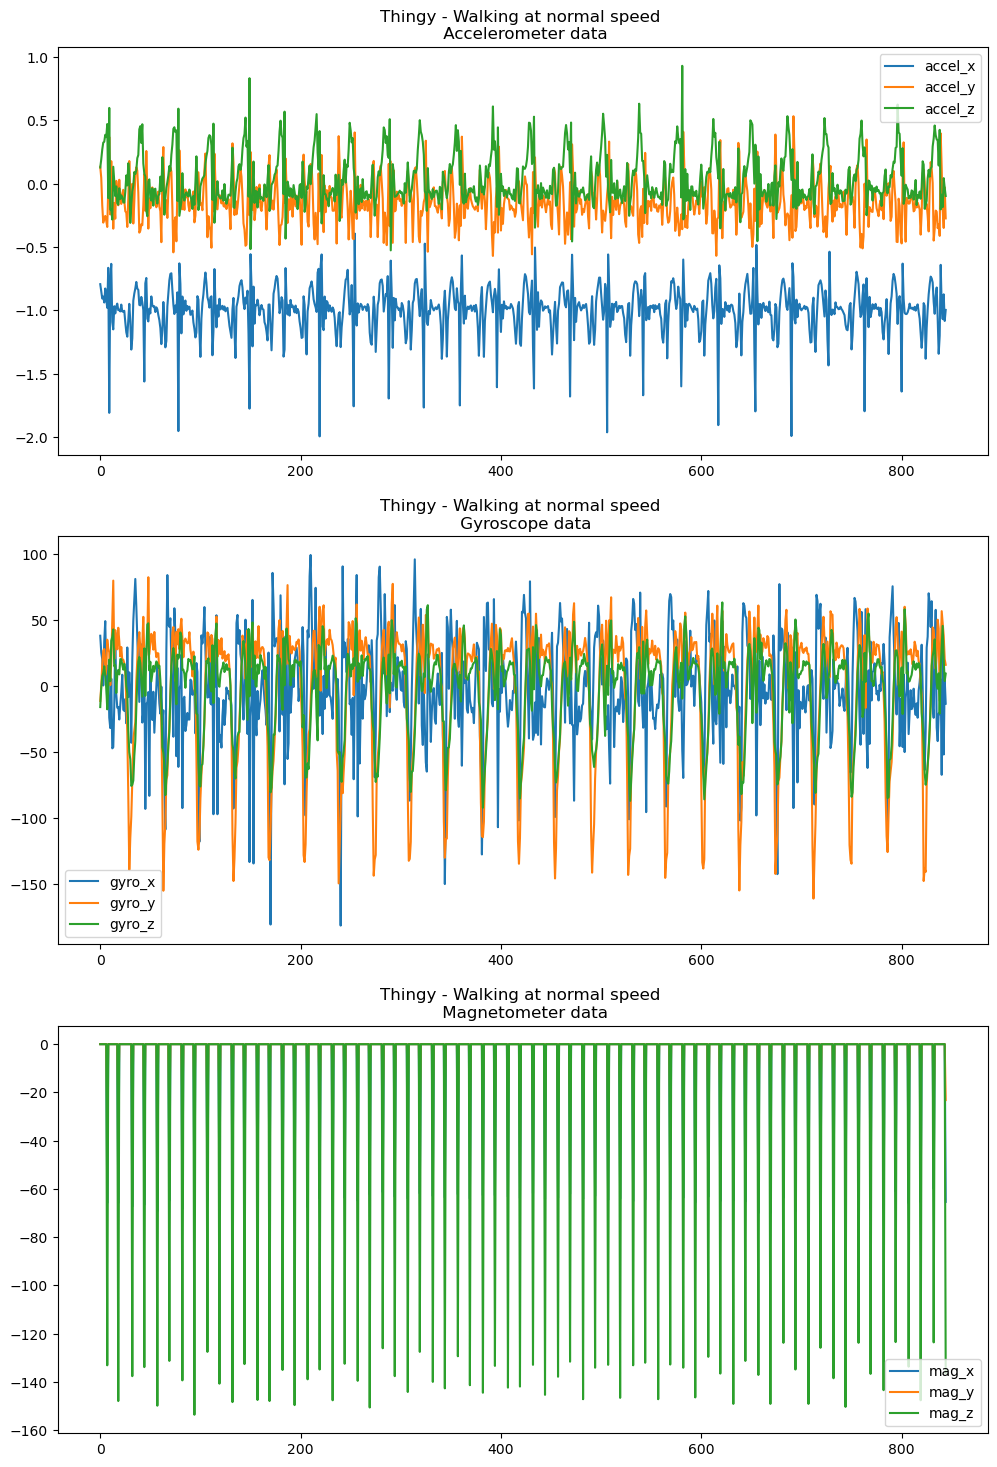

In [418]:
filename_thingy = "./Data/Dirty/Thingy_s1817967_Walking at normal speed_30-09-2022_17-05-32.csv"

# extract header information
sensor_type, activity_type, activity_code, subject_id, notes = extract_header_info(filename=filename_thingy)

# load data
df_thingy = pd.read_csv(filename_thingy, header=header_size)

# append recording metadata
df_thingy['sensor_type'] = sensor_type
df_thingy['activity_type'] = activity_type
df_thingy['activity_code'] = activity_code
df_thingy['subject_id'] = subject_id
df_thingy['notes'] = notes

# get the recording ID
df_thingy['recording_id'] = filename_thingy.split("/")[-1].split(".")[0]

fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# plot thingy
ax[0].plot(df_thingy['accel_x'], label="accel_x")
ax[0].plot(df_thingy['accel_y'], label="accel_y")
ax[0].plot(df_thingy['accel_z'], label="accel_z")
ax[0].legend()

ax[0].set_title(f"{df_thingy['sensor_type'].values[0]} - {df_thingy['activity_type'].values[0]} \n Accelerometer data")

ax[1].plot(df_thingy['gyro_x'], label="gyro_x")
ax[1].plot(df_thingy['gyro_y'], label="gyro_y")
ax[1].plot(df_thingy['gyro_z'], label="gyro_z")
ax[1].legend()

ax[1].set_title(f"{df_thingy['sensor_type'].values[0]} - {df_thingy['activity_type'].values[0]} \n Gyroscope data")

ax[2].plot(df_thingy['mag_x'], label="mag_x")
ax[2].plot(df_thingy['mag_y'], label="mag_y")
ax[2].plot(df_thingy['mag_z'], label="mag_z")
ax[2].legend()

ax[2].set_title(f"{df_thingy['sensor_type'].values[0]} - {df_thingy['activity_type'].values[0]} \n Magnetometer data")

## Saving your clean data

When you are done cleaning your data you can save it to a location of your choice by running the following commands:

In [295]:
rec_name = df_respeck.recording_id.values[0]
print(rec_name)

df_respeck.to_csv(f"./Data/Clean/{rec_name}.csv", index=False)

Respeck_s1817967_Walking at normal speed_30-09-2022_16-29-44


In [417]:
rec_name = df_thingy.recording_id.values[0]
print(rec_name)

df_thingy.to_csv(f"./Data/Clean/{rec_name}.csv", index=False)

Thingy_s1817967_Standing_30-09-2022_17-16-31


## Uploading collected data

The format in which you should save each of your recordings is the format we arrive at in this notebook. That is:
- no header
- all the header information transformed into column values
- column list:
    * timestamp
    * accel_x, accel_y, accel_z
    * gyro_x, gyro_y, gyro_z
    * (for Thingy recordings) mag_x, mag_y, mag_z
    * sensor_type
    * activity_type
    * activity_code
    * subject_id
    * notes
    * recording_id
    
Be very vareful when uploading these to the shared repository and make sure your files are in the correct format. We will be checking your submissions automatically. 

You can double check the columns of your dataframe by running:

In [27]:
df_respeck.columns

Index(['timestamp', 'accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y',
       'gyro_z', 'sensor_type', 'activity_type', 'activity_code', 'subject_id',
       'notes', 'recording_id'],
      dtype='object')

## Common techniques to consider

* There are two main ways in which you can tackle this HAR task: using Machine Learning algorithms (Random Forest Classifier (RFC), Clustering, Regression etc), or Deep Learning methods (Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN) etc).


* The most common way to preprocess time series data is to divide it into sliding windows (you can choose how much they overlap).


* The sliding windows can then be directly passed to your algorithm (for example the CNN), or you can extract features of the signal from the windows and pass a vector of features to the classification algorithm (for example, a RFC). 


* Be very careful about splitting the data into training, validation and test sets. Your algorithms will perform extremely well when data is coming from the same subject. You need to test your algorithms with a technique called Leave One Subject Out Cross Validation (LOSOXV) whereby you test your method on data from an unseen subject.

The Week 2 - Introduction to Human Activity Recognition lab gives you an overview of these techniques.